### Objective: To determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. It is a classification problem to know the employee leave or not.

# Part 1: Data Preprocessing

In [1]:
# Import Libararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### dataset_link = https://www.kaggle.com/patelprashant/employee-attrition?select=WA_Fn-UseC_-HR-Employee-Attrition.csv

In [2]:
# Import dataset.
dataset = pd.read_csv(r'N:\Projects\Machine Learning Project\Employee Attrition Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
dataset.shape

(1470, 35)

In [5]:
# Dataset columns.
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Dataset informations.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Categorical Columns
dataset.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
# Number of categorical columns.
len(dataset.select_dtypes(include='object').columns)

9

In [9]:
# Numerical Columns
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Number of Numerical data columns. 
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

26

In [11]:
# Statistical summary
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Restructing the dataset

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
# drop columns which makes no sense
dataset = dataset.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

In [15]:
dataset.shape

(1470, 31)

## Dealing with the missing values

In [16]:
# Check dataset having null values.
dataset.isnull().values.any()

False

In [17]:
# Sum of dataset null values.
dataset.isnull().values.sum()

0

## CountPlot

<AxesSubplot:xlabel='Attrition', ylabel='count'>

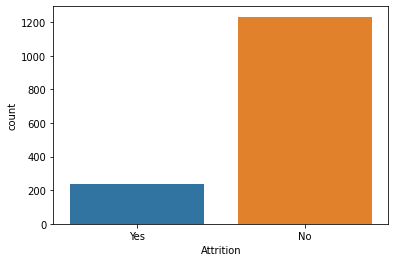

In [18]:
sns.countplot(dataset['Attrition'])

In [19]:
# Employees left the company
(dataset['Attrition']=='Yes').sum()

237

In [20]:
# Employees not left the company
(dataset['Attrition']=='No').sum()

1233

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

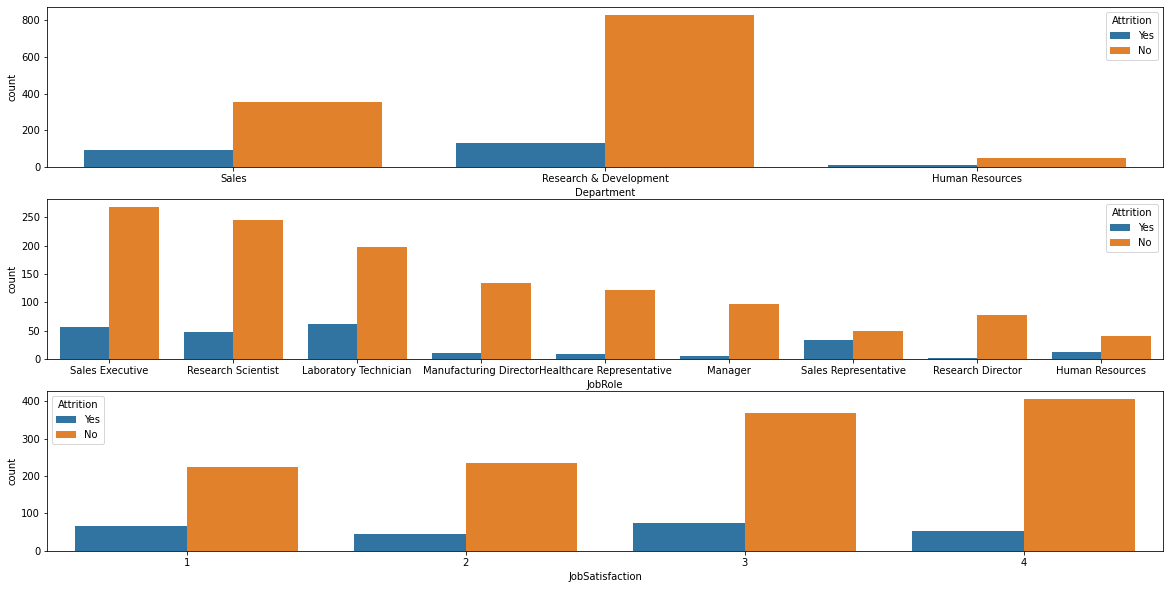

In [21]:
# attrition countplot according to Department, JobRole, and JobSatisfaction. 
plt.figure(figsize=(20,10))
plt.subplot(3, 1, 1)
sns.countplot(x='Department', hue='Attrition', data=dataset)
plt.subplot(3, 1, 2)
sns.countplot(x='JobRole', hue='Attrition', data=dataset)
plt.subplot(3, 1, 3)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=dataset)

## Correlation

In [22]:
corr = dataset.corr()

<AxesSubplot:>

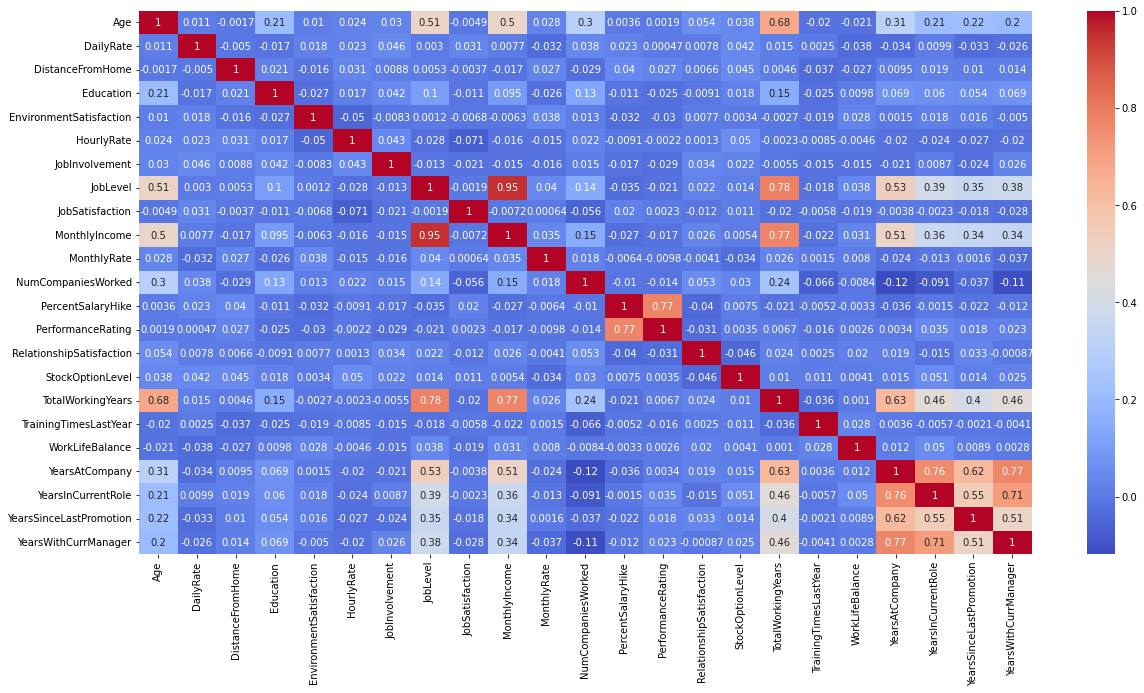

In [23]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True,cmap='coolwarm')

## Dealing With Categorical Data

In [24]:
# Categorical columns
cat_col = dataset.select_dtypes(include='object').columns
cat_col

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [25]:
len(dataset.select_dtypes(include='object').columns)

8

In [26]:
dataset.shape

(1470, 31)

## One Hot Encoding

In [27]:
# Check the number of unique values in 8 categorical columns.
for i in cat_col:
    print(f"{i} =", dataset[i].nunique())

Attrition = 2
BusinessTravel = 3
Department = 3
EducationField = 6
Gender = 2
JobRole = 9
MaritalStatus = 3
OverTime = 2


In [28]:
# encoding the categorical columns.
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [29]:
dataset.shape

(1470, 45)

In [30]:
# Check the number of categorical columns.
len(dataset.select_dtypes(include='object').columns)

0

In [31]:
dataset.rename(columns=({"Attrition_Yes": "Attrition"}), inplace=True)

# Splitting the dataset

In [32]:
x = dataset.drop(columns='Attrition')

In [33]:
y = dataset['Attrition']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Splitting the dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2: building the Model

### 1) Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)

LogisticRegression()

In [40]:
y_pred = classifier_lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
# Accuracy Score of Logistic Regression.
acc = accuracy_score(y_test, y_pred)
acc

0.8843537414965986

In [43]:
# Confusion matrix of Logistic Regression
cm = confusion_matrix(y_test, y_pred)
cm

array([[237,   8],
       [ 26,  23]], dtype=int64)

### 2) Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
classifier_rf = RandomForestClassifier()

In [46]:
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = classifier_rf.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
acc

0.8469387755102041

In [49]:
# Confusion matrix of RandomForestClassifier.
confusion_matrix(y_test, y_pred)

array([[243,   2],
       [ 43,   6]], dtype=int64)

### 3) SVM

In [50]:
from sklearn.svm import SVC

In [51]:
classifier_svc = SVC()

In [52]:
classifier_svc.fit(x_train, y_train)

SVC()

In [53]:
y_pred = classifier_svc.predict(x_test)

In [54]:
# Accuracy Score of SVC
acc = accuracy_score(y_test, y_pred)
acc

0.8673469387755102

In [55]:
# Confusion matrix of SVC.
confusion_matrix(y_test, y_pred)

array([[243,   2],
       [ 37,  12]], dtype=int64)

### 4) XGBoost Classifier

In [56]:
from xgboost import XGBClassifier

In [57]:
classifier_xgb = XGBClassifier()

In [58]:
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
y_pred = classifier_xgb.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
# Accuracy score of XGBClassifier
acc = accuracy_score(y_test, y_pred)
acc

0.8537414965986394

In [62]:
# Confusion matrix of XGBClassifier.
confusion_matrix(y_test, y_pred)

array([[237,   8],
       [ 35,  14]], dtype=int64)

## Part 3: Randomized Search for best Parameters

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
parameters = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[50,100,500,2000,5000]
    }

In [65]:
parameters

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [50, 100, 500, 2000, 5000]}

In [66]:
random_cv = RandomizedSearchCV(estimator=classifier_lr, param_distributions=parameters, 
                               n_iter=10, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [67]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'max_iter': [50, 100, 500, 2000, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [68]:
random_cv.best_estimator_

LogisticRegression(C=1.5, penalty='l1', solver='liblinear')

In [69]:
random_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 1.5}

In [70]:
random_cv.best_score_

0.8211257939016422

# Part 4: Final Model (Logistic Regression)

In [71]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500, penalty='l1', solver='saga')
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=500, penalty='l1', solver='saga')

In [72]:
y_pred = classifier.predict(x_test)

In [73]:
# Final model accuracy score.
accuracy_score(y_test, y_pred)

0.8843537414965986

In [74]:
# Final model confusion matrix.
confusion_matrix(y_test, y_pred)

array([[237,   8],
       [ 26,  23]], dtype=int64)

# Part 5: Predicting a Single Observation

In [75]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [76]:
single_obs = [list(x.iloc[0])]

In [77]:
classifier.predict(sc.transform(single_obs))

array([1], dtype=uint8)